# Preview of my analysis:
The dataset has 891 rows and 12 columns. Missing values are present only in the Age, Cabin, and Embarked columns.  A higher survival rate was observed among females compared to males   Survival rates were higher for people in the upper (136 survivors) and lower (119 survivors) socio-economic classes than for the middle class (87 survivors    The predominant age group of passengers is between 20 and 50 years old, with the 20-30 years category having the highest count. Within this age range, there is a declining trend in passenger numbers as age increases. This suggests that young adults and middle-aged passengers form the broadest age demographic on the Titanic.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Load the Titanic dataset from a CSV file
# Set 'PassengerId' as the index column for easier data manipulation and access
titanic = pd.read_csv('titanic.csv', index_col='PassengerId')
titanic.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [51]:
titanic.shape

(891, 11)

In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [70]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.646465,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.920143,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
# Count the number of duplicate rows in the Titanic dataset
# This helps in identifying if any rows are exact copies, 
# which could skew analysis or modeling
titanic.duplicated().sum()

0

C:\Users\x-ibah\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

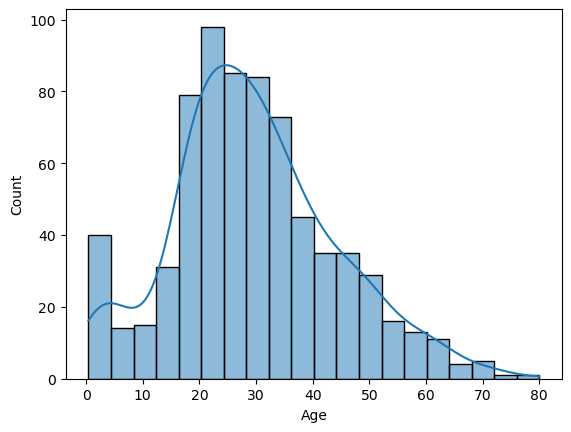

In [121]:
# Plotting the distribution of the 'Age' column from the Titanic dataset
sns.histplot(titanic, x="Age", kde=True)

In [123]:
# Drop the 'Cabin', 'Ticket', and 'Fare' columns from the Titanic dataset
# These columns are removed because they are not needed for the model prediction
titanic.drop(['Cabin', 'Ticket', 'Fare'], inplace=True, axis=1)

In [107]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

In [124]:
# fill missing values in `Age` columns with the `.interpolate()` function
titanic.Age = titanic.Age.interpolate()

In [125]:
# Calculate the most frequent value (mode) of the 'Embarked' column
mode_embarked = titanic.Embarked.mode()[0]

# Fill missing values in the 'Embarked' column with the computed mode
titanic.Embarked.fillna(mode_embarked, inplace=True)

In [130]:
# Rename columns in the titanic DataFrame for clarity:
titanic.rename(columns={
    'SibSp': 'NumSiblings_Spouses',
    'Parch': 'NumParents_Children',
    'Pclass': 'Travel_Class'
}, inplace=True)

In [131]:
# replacements dictionary: Maps shorthand embarkation codes to full names
replacements = {
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton'
}
titanic['Embarked'] = titanic['Embarked'].map(replacements)

In [129]:
titanic.head()

,Survived,Passenger_Class,Name,Sex,Age,NumSiblings_Spouses,NumParents_Children,Embarked
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,Southampton
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,Cherbourg
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,Southampton
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,Southampton
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,Southampton


C:\Users\x-ibah\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


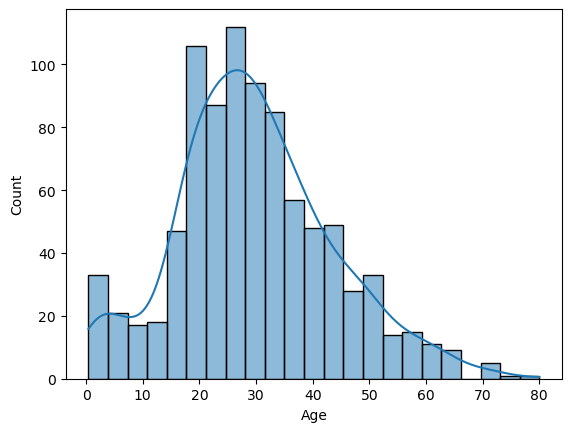

In [137]:
# Plotting the distribution of the 'Age' column from the cleaned Titanic dataset
sns.histplot(titanic, x="Age", kde=True) # Creates a histogram with a KDE plot overlay
plt.show()

In [136]:
# Save the cleaned Titanic dataset to a CSV file without the index column
titanic.to_csv('titanic_cleaned.csv', index=False)

# Read the saved CSV file back into a pandas DataFrame to verify or for further use
pd.read_csv('titanic_cleaned.csv')

,PassengerId,Survived,Passenger_Class,Name,Sex,Age,NumSiblings_Spouses,NumParents_Children,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.5,1,2,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,NaN
